In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_oportunidades = pd.read_csv('data/Entrenamieto_ECI_2020.csv')

In [3]:
df_oportunidades.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [4]:
df_oportunidades.columns

Index(['ID', 'Region', 'Territory', 'Pricing, Delivery_Terms_Quote_Appr',
       'Pricing, Delivery_Terms_Approved', 'Bureaucratic_Code_0_Approval',
       'Bureaucratic_Code_0_Approved', 'Submitted_for_Approval',
       'Bureaucratic_Code', 'Account_Created_Date', 'Source ',
       'Billing_Country', 'Account_Name', 'Opportunity_Name', 'Opportunity_ID',
       'Sales_Contract_No', 'Account_Owner', 'Opportunity_Owner',
       'Account_Type', 'Opportunity_Type', 'Quote_Type', 'Delivery_Terms',
       'Opportunity_Created_Date', 'Brand', 'Product_Type', 'Size',
       'Product_Category_B', 'Price', 'Currency', 'Last_Activity',
       'Quote_Expiry_Date', 'Last_Modified_Date', 'Last_Modified_By',
       'Product_Family', 'Product_Name', 'ASP_Currency', 'ASP',
       'ASP_(converted)_Currency', 'ASP_(converted)',
       'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date', 'Month',
       'Delivery_Quarter', 'Delivery_Year', 'Actual_Delivery_Date', 'TRF',
       'Total_Amount_Currenc

In [5]:
df_oportunidades.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,16947.000000,16947.000000,16947.000000,16947.000000,16947.000000,16947.0,16947.000000,13738.000000,13738.000000,16947.000000,16947.000000,1.688800e+04,1.694700e+04
mean,17666.650440,0.807990,0.583584,0.475482,0.318876,0.0,5335.940225,7.012128,0.432554,2017.137428,2.338172,1.993659e+06,3.224117e+06
std,6940.859372,0.393893,0.492979,0.499413,0.466055,0.0,3324.723809,18.858359,0.758659,0.829603,12.169339,1.848426e+07,2.030360e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11953.000000,1.000000,0.000000,0.000000,0.000000,0.0,2448.500000,0.360000,0.373260,2016.000000,0.000000,2.677500e+04,8.546580e+04
50%,18114.000000,1.000000,1.000000,0.000000,0.000000,0.0,5306.000000,0.400000,0.412850,2017.000000,0.000000,1.072500e+05,3.760672e+05
75%,23845.500000,1.000000,1.000000,1.000000,1.000000,0.0,7698.000000,0.505000,0.476490,2018.000000,1.000000,4.603898e+05,1.037450e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


In [44]:
df_oportunidades.dropna(inplace=True)

In [60]:
df_oportunidades.describe()

,ID,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Opportunity_ID,ASP,ASP_(converted),Delivery_Year,TRF,Total_Amount,Total_Taxable_Amount
count,13684.000000,13684.000000,13684.000000,13684.000000,13684.000000,13684.0,13684.000000,13684.000000,13684.000000,13684.000000,13684.000000,1.368400e+04,1.368400e+04
mean,16482.372406,0.774993,0.568840,0.530327,0.362979,0.0,5400.808243,7.004230,0.431282,2017.220184,2.824978,2.440420e+06,3.640489e+06
std,6531.039649,0.417602,0.495257,0.499098,0.480876,0.0,3188.518793,18.838014,0.759576,0.809737,13.360199,2.050742e+07,2.243690e+07
min,4854.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2016.000000,0.000000,0.000000e+00,0.000000e+00
25%,11059.750000,1.000000,0.000000,0.000000,0.000000,0.0,2742.000000,0.360000,0.373260,2017.000000,0.000000,6.361149e+04,7.790250e+04
50%,16724.500000,1.000000,1.000000,1.000000,0.000000,0.0,5306.500000,0.400000,0.412850,2017.000000,0.000000,1.535070e+05,2.435469e+05
75%,21668.250000,1.000000,1.000000,1.000000,1.000000,0.0,7769.000000,0.505000,0.476490,2018.000000,1.000000,7.040736e+05,1.021989e+06
max,28773.000000,1.000000,1.000000,1.000000,1.000000,0.0,12803.000000,80.000000,67.000000,2020.000000,500.000000,1.320000e+09,1.356339e+09


### Veo si el campo Opportunity_Name y Opportunity_ID identifican la oportunidad inequivocamente

In [101]:
oportunidades = df_oportunidades.groupby(['Opportunity_ID','Region'])['Region'].count().to_frame()
oportunidades_name = df_oportunidades.groupby(['Opportunity_Name','Region'])['Region'].count().to_frame()

In [102]:
oportunidades = oportunidades.rename(columns={"Region": "total"}).reset_index()
oportunidades_name = oportunidades_name.rename(columns={"Region": "total"}).reset_index()

In [103]:
oportunidades.head()

,Opportunity_ID,Region,total
0,0,EMEA,1
1,1,EMEA,1
2,2,Americas,1
3,3,Americas,1
4,4,Americas,1


In [164]:
len(oportunidades)

9789

In [109]:
oportunidades_region = oportunidades['Region'].value_counts()
oportunidades_region

EMEA           3235
Americas       2429
APAC           2079
Japan          1897
Middle East     149
Name: Region, dtype: int64

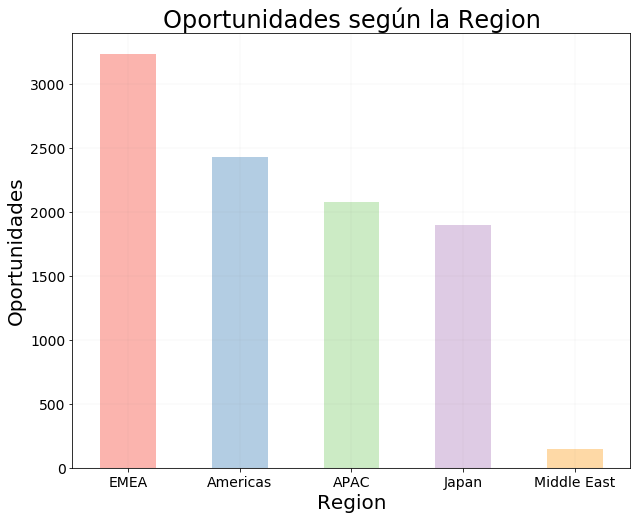

In [110]:
paired_colors = plt.cm.Pastel1(range(len(oportunidades_region)))
oportunidades_region.plot(kind='bar', rot=0, figsize=(10,8), color=paired_colors, fontsize=14, label='index')
plt.grid(color='grey', linestyle='-', linewidth=0.2, alpha=0.3)
plt.title('Oportunidades según la Region', fontsize=24);
plt.xlabel('Region', fontsize=20);

plt.ylabel('Oportunidades', fontsize=20);

In [173]:
oportunidades_stage = df_oportunidades[['Opportunity_ID','Stage']]\
        .groupby(['Opportunity_ID','Stage'])['Stage'].count().to_frame().rename(columns={"Stage": "total"})\
        .reset_index()
cantidad_oportunidades = oportunidades_stage.groupby(['Stage']).count().reset_index()
cant = len(oportunidades_stage)
cantidad_oportunidades

,Stage,Opportunity_ID,total
0,Closed Lost,4669,4669
1,Closed Won,5070,5070
2,Negotiation,11,11
3,Proposal,30,30
4,Qualification,9,9


In [174]:
cantidad_oportunidades['total'] = cant
cantidad_oportunidades

,Stage,Opportunity_ID,total
0,Closed Lost,4669,9789
1,Closed Won,5070,9789
2,Negotiation,11,9789
3,Proposal,30,9789
4,Qualification,9,9789


In [176]:
cantidad_oportunidades['porcentaje'] = cantidad_oportunidades['Opportunity_ID']*100/cantidad_oportunidades['total']

In [179]:
cantidad_oportunidades

,Stage,Opportunity_ID,total,porcentaje
0,Closed Lost,4669,9789,47.696394
1,Closed Won,5070,9789,51.792829
2,Negotiation,11,9789,0.112371
3,Proposal,30,9789,0.306466
4,Qualification,9,9789,0.091940


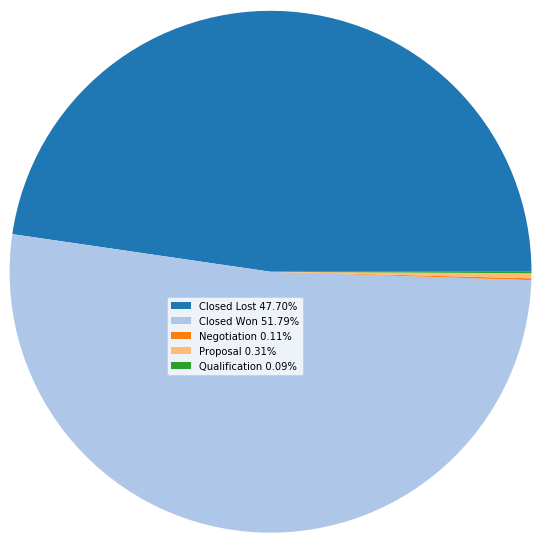

In [180]:
stages = ['Closed Lost 47.70%', 'Closed Won 51.79%', 'Negotiation 0.11%', 'Proposal 0.31%', 'Qualification 0.09%']
p_colors = plt.cm.tab20(range(len(stages)))
plt.pie(cantidad_oportunidades['Opportunity_ID'], radius=3, colors=p_colors)
plt.legend(stages)
plt.show()

## ¿Quienes son las familias de productos con más oportunidades?

In [184]:
top10_familias_prod = df_oportunidades['Product_Family'].value_counts().nlargest(10)

top10_familias_prod

Product_Family_77     1323
Product_Family_133    1249
Product_Family_132     763
Product_Family_212     636
Product_Family_100     619
Product_Family_85      593
Product_Family_115     539
Product_Family_109     499
Product_Family_208     478
Product_Family_128     436
Name: Product_Family, dtype: int64

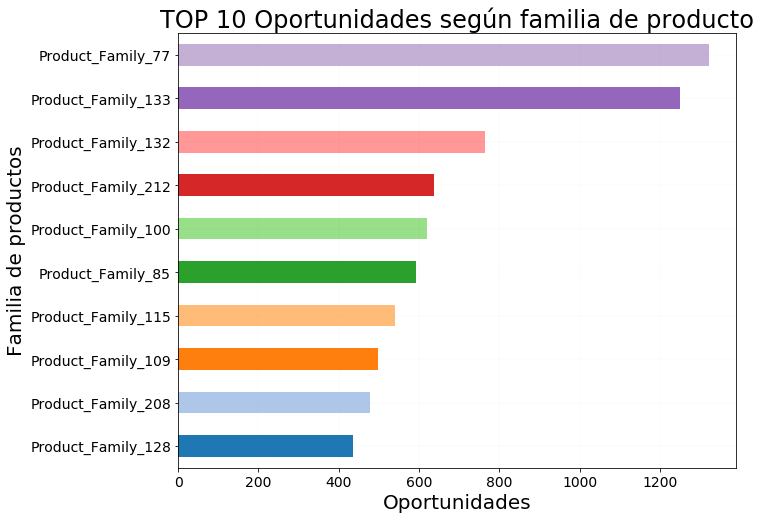

In [185]:
p_colors = plt.cm.tab20(range(len(top10_familias_prod)))

top10_familias_prod.sort_values(ascending=True).plot(kind='barh', rot=0, figsize=(10,8), color=p_colors, fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('TOP 10 Oportunidades según familia de producto', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Familia de productos', fontsize=20);

In [249]:
familia_77 = df_oportunidades[df_oportunidades['Product_Family'] == 'Product_Family_77']

familia_77['ASP'].value_counts()

68.000    124
75.000     95
78.000     78
0.530      60
0.550      52
         ... 
0.435       1
47.000      1
61.000      1
1.000       1
44.000      1
Name: ASP, Length: 101, dtype: int64

In [235]:
familia_133 = df_oportunidades[df_oportunidades['Product_Family'] == 'Product_Family_133']
familia_133['Pricing, Delivery_Terms_Approved'].value_counts()

1    666
0    583
Name: Pricing, Delivery_Terms_Approved, dtype: int64

In [232]:
familia_132 = df_oportunidades[df_oportunidades['Product_Family'] == 'Product_Family_132']
familia_132['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    599
0    164
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

## ¿Cuales son los productos con más oportunidades de venta?

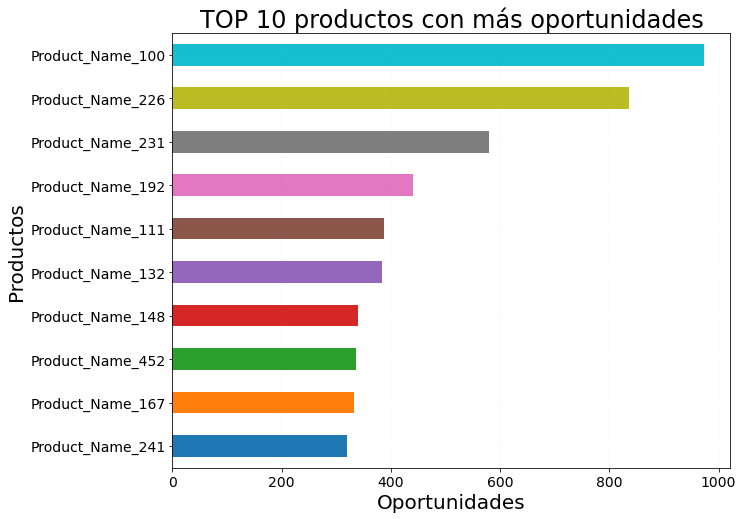

In [9]:
top10_nombre_prod = df_oportunidades['Product_Name'].value_counts().nlargest(10)

p_colors = plt.cm.tab10(range(len(top10_nombre_prod)))

top10_nombre_prod.sort_values(ascending=True).plot(kind='barh',color=p_colors, rot=0, figsize=(10,8), fontsize=14)
plt.grid(color='grey', linestyle='-', linewidth=0.1, alpha=0.3)
plt.title('TOP 10 productos con más oportunidades', fontsize=24);
plt.xlabel('Oportunidades', fontsize=20);

plt.ylabel('Productos', fontsize=20);

## ¿Influye le precio del producto en que se concrete la oportunidad?

La mayoría de los valores son None y Other. No se puede sacar conclusiones acerca del valor.

In [10]:
df_oportunidades['Price'].value_counts()

None     12765
Other      585
0.24        27
0.28        20
0.27        18
0.41        17
0.29        17
0.32        15
0.35        14
0.23        13
0.33        12
0.38        12
0.34        11
0.26        11
0.3         11
0.42        10
0.31        10
0.245        8
0.305        7
0.25         7
0.325        6
0.225        6
0.335        6
0.22         6
0.2          5
0.39         5
0.36         4
0.285        4
0.45         4
0.275        4
0.37         4
0.265        3
0.255        3
0.295        3
0.47         3
0.355        3
0.235        2
0.445        2
0.215        2
0.315        2
0.345        2
0.375        2
0.44         2
0.4          2
0.465        1
0.52         1
0.365        1
0.48         1
0.55         1
0.56         1
0.505        1
0.49         1
0.21         1
Name: Price, dtype: int64

In [11]:
grupo_anio = df_oportunidades.groupby(['Delivery_Year','Stage']).agg({'Territory':'count'}).reset_index()

estados_por_anio = grupo_anio.pivot_table(index=["Stage"],values=["Territory"],columns=["Delivery_Year"])

In [14]:
estados_anio = estados_por_anio.fillna(0).astype('int32')

estados_anio.columns = estados_anio.columns.droplevel()

#estados_anio.reset_index(inplace=True)

estados_anio

Delivery_Year,2016,2017,2018,2019,2020
Stage,,,,,
Closed Lost,1289,2159,2403,244,0
Closed Won,1595,3156,2682,97,0
Negotiation,0,0,0,14,0
Proposal,0,1,0,22,11
Qualification,0,0,0,8,3


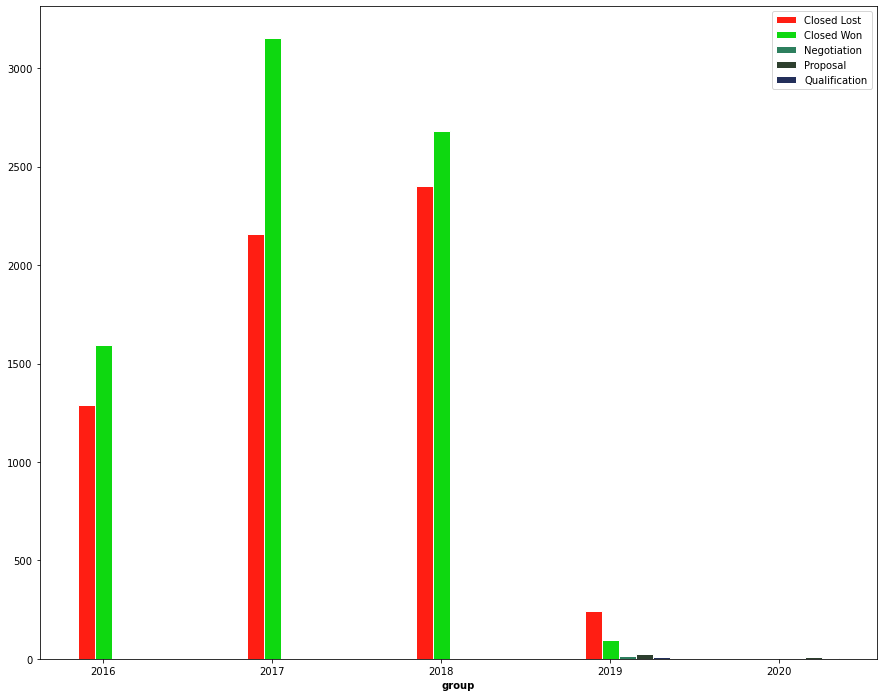

In [34]:
barWidth = 0.1
# Set position of bar on X axis
r1 = np.arange(len(estados_anio))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

plt.bar(r1, estados_anio.iloc[0], color='#FF1E13', width=barWidth, edgecolor='white', label='Closed Lost')
plt.bar(r2, estados_anio.iloc[1], color='#0ED810', width=barWidth, edgecolor='white', label='Closed Won')
plt.bar(r3, estados_anio.iloc[2], color='#2d7f5e', width=barWidth, edgecolor='white', label='Negotiation')
plt.bar(r4, estados_anio.iloc[3], color='#2d3f2e', width=barWidth, edgecolor='white', label='Proposal')
plt.bar(r5, estados_anio.iloc[4], color='#232f5a', width=barWidth, edgecolor='white', label='Qualification')
plt.rcParams["figure.figsize"] = (15,14)
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(estados_anio))], ['2016', '2017', '2018', '2019', '2020'])
plt.legend()
plt.show()
